## Créer un grand fichier all2.txt

In [361]:
!cat ../tp4/camille_Titanic/*.txt > ../tp4/all2.txt

18953.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## Créer un nuage de mots pour l'année 1912

**Imports et stopwords**

In [362]:
# Imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoukchapuis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [363]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "bruxelles", "peu", "toujours", "heure",
       "midi", "mois", "quelques", "quelque", "fit", "brux", "ceux", "plusieurs", "rossel",
       "agence", "devant", "avant", "leurs", "dès", "alors", "enfin", "voir", "rien", "jamais",
       "puis", "elles", "celui", "aucun", "car", "vers", "tant", "jours", "ans", "an",
       "année", "années", "dernier", "dernière", "maison", "prix", "rue", "hier", "soir",
       "dés", "fois", "quand", "près", "chaque", "assez", "très", "saint", "heures", "francs",
       "toute", "jour", "laquelle", "dem", "prendre", "personne", "personnes", "gens", "temps",
       "chez", "ici", "seulement", "vient", "trop", "suite", "avenue", "etc", "façon", "seul",
       "cependant", "cas", "mis", "mme", "louer", "vendre", "hui", "parmi", "effet", "bon", 
       "bons", "bonne", "bonnes", "grand", "grands", "grande", "grandes", "petit", "petits",
       "petite", "petites", "nouveau", "nouveaux", "neuve", "nouvelles", "nouvelle", "voici",
       "partie", "part", "mètres", "mètre", "un", "deux", "trois", "quatre", "cinq", "cas", "parce",
       "déjà", "reste", "donner", "nombre", "mal", "jeune", "comme", "vend", "new", "dix", "pris",
       "vente", "aucune", "nombreux", "oui", "lorsque", "long", "également", "egalement", "première",
       "premiere", "gros", "général", "générale", "aujourd", "ensuite", "demi", "bas", "ecr",
       "partir", "premier", "font", "presque", "reçu", "dix", "parti"]
sw = set(sw)

**Création d'un fichier pour l'année 1912**

In [364]:
# Choix d'une année
year = 1912

In [365]:
# Liste des fichiers de cette année
data_path = '../tp4'
txt_path = '../tp4/camille_Titanic'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1912-04-30_01-00003.txt',
 'KB_JB838_1912-05-19_01-00002.txt',
 'KB_JB838_1912-04-22_01-00002.txt',
 'KB_JB838_1912-04-25_01-00003.txt',
 'KB_JB838_1912-11-09_01-00006.txt',
 'KB_JB838_1912-04-23_01-00004.txt',
 'KB_JB838_1912-04-30_01-00002.txt',
 'KB_JB838_1912-04-24_01-00004.txt',
 'KB_JB838_1912-10-27_01-00005.txt',
 'KB_JB838_1912-05-29_01-00004.txt',
 'KB_JB838_1912-04-25_01-00001.txt',
 'KB_JB838_1912-04-22_01-00001.txt',
 'KB_JB838_1912-09-21_01-00003.txt',
 'KB_JB838_1912-10-11_01-00006.txt',
 'KB_JB838_1912-06-04_01-00004.txt',
 'KB_JB838_1912-04-30_01-00005.txt',
 'KB_JB838_1912-04-24_01-00003.txt',
 'KB_JB838_1912-04-23_01-00003.txt',
 'KB_JB838_1912-06-16_01-00001.txt',
 'KB_JB838_1912-04-25_01-00004.txt',
 'KB_JB838_1912-04-22_01-00004.txt',
 'KB_JB838_1912-04-23_01-00002.txt',
 'KB_JB838_1912-05-19_01-00005.txt',
 'KB_JB838_1912-05-29_01-00002.txt',
 'KB_JB838_1912-06-04_01-00003.txt',
 'KB_JB838_1912-06-03_01-00003.txt',
 'KB_JB838_1912-09-20_01-00003.txt',
 

In [366]:
# Stockage du contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [367]:
# Comptage du nombre d'éléments (=fichiers) dans la liste
len(content_list)

152

In [368]:
# Ecriture de tout le contenu dans un fichier temporaire
temp_path = '../tp4/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

**Nettoyage du fichier 1912.txt**

In [369]:
# Création de la fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [370]:
# Application de la fonction au fichier
clean_text(year, folder=temp_path)

'Output has been written in ../tp4/tmp/1912_clean.txt!'

In [371]:
# Vérification du résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'eoiiüjrfttulaîent dame remettait nue ojçrbe tteture fiéeee paris madrid arriva vpemtâr dau efiiquièiue éiape bruxeales roubîdx kxfceûni concurrents loin derrière lut bravant teiikpôte massait orneore premier étape vante roubaix ratiais eptito étape atots domvreâ dauvras tondres ituluènro loaeteee brisfifim dou rres neuvième meovres calaùs fusant lore uiotetees jmar aloj èspâvall pesitror triomphateur paris paoao moteur retardait froyères classa oaeecmeat générai aooompîl traie oeuaptet beaumont '

**Création d'un nuage de mots pour le fichier 1912_clean.txt**

In [372]:
# Affichage des termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('avril', 825), ('dos', 802), ('mai', 688), ('paris', 598), ('femme', 548), ('matin', 537), ('ministre', 532), ('nord', 516), ('place', 512), ('lieu', 509)]


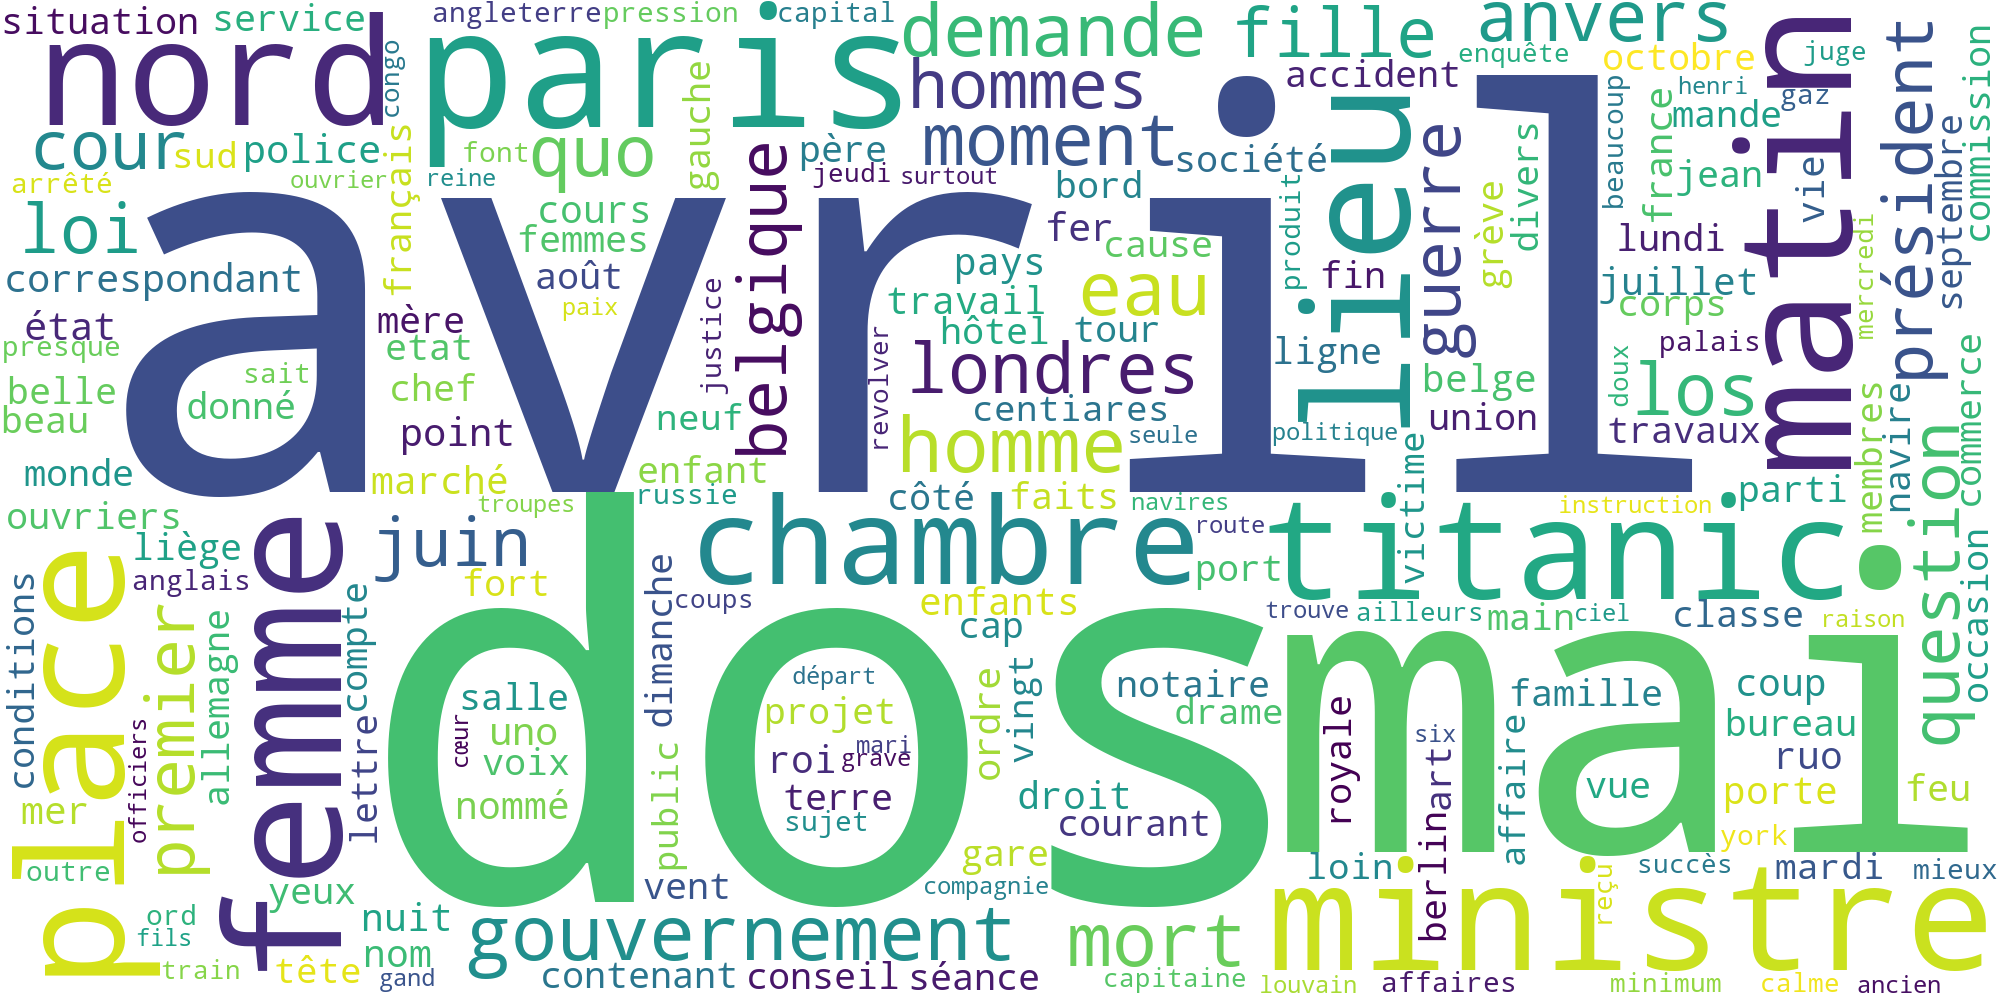

In [373]:
# Création, stockage et affichage du nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))